# Question 1

In [25]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [26]:
df = pd.read_excel('data1_reg_ass2.xlsx')
df

,Area,Bedrooms,Age,Price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,3,18,610000
3,3600,3,30,595000
4,4000,5,8,760000
5,4100,6,8,810000


#### Residual analysis for simple regression between price and area 

In [27]:
# Add a constant to the DataFrame for the regression intercept
df = sm.add_constant(df)

# Perform the regression
model = sm.OLS(df['Price'], df[['const', 'Area']])
results = model.fit()

# Print out the statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     17.35
Date:                Fri, 15 Mar 2024   Prob (F-statistic):             0.0141
Time:                        10:57:02   Log-Likelihood:                -72.543
No. Observations:                   6   AIC:                             149.1
Df Residuals:                       4   BIC:                             148.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.669e+04   1.39e+05      0.552      0.6

C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### CONCLUSION
#### Price = 7.669 + 167.3095(Area)
    -Here the model tells us that for one umit change in the Area there will be an average increase in 167.30 rupees in the price. Further the intercept tells that there will be an average price of rupees 7.66 rupees if area is zero units.
    
    -Since the p-value for Area i.e., 0.014 which is less than 0.05 shows that there is a statistically significant associtation between the price and the area.
    
    -R-squared value tells us that the 81.3% vairation can be explained by the Area variable.
    
    -Here, F statistics and corresponding p-values tell us the overall significance of the regression model that is whether explanatory variable in the model are useful for explaining the variation in response variable. Since p-value in the example is less than the 0.05 therefore our model is statistically significant, thus the regressor i.e, Area is usefull in explaining the variation of the price.
       



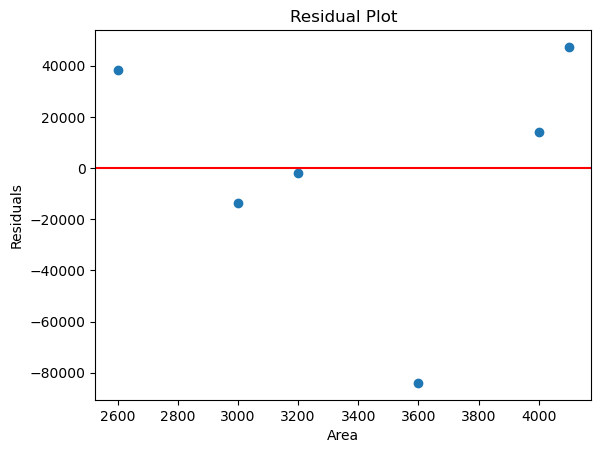

In [31]:
# Calculate the residuals
df['Residuals'] = results.resid

# Plot the residuals
plt.scatter(df['Area'], df['Residuals'])
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Area')
plt.ylabel('Residuals')
plt.show()

#### Residual analysis for multiple regression between price and rest of the variables. 

In [9]:
# Fit the multiple linear regression model
model = sm.OLS(df['Price'], df[['const', 'Area', 'Bedrooms', 'Age']]).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     13.65
Date:                Thu, 14 Mar 2024   Prob (F-statistic):             0.0690
Time:                        01:45:43   Log-Likelihood:                -68.367
No. Observations:                   6   AIC:                             144.7
Df Residuals:                       2   BIC:                             143.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.565e+05   1.53e+05      1.674      0.2

C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### CONCLUSION
#### Price = 2.565 + 119.6791(Area) + 1.31(Bedrooms) - 4207.2876(Age)
    -This model reveals that every one unit increase in Area, price will also increase by an average of 119.67 rupees. Also one no.of bedroom increase will lead to an average increase in 1.31 rupees. But one year increase in Age will lead to an average decrease of 4207.28 rupees in the Price.Further more the intercept value indicates that when all the other regressors are constant then the average price will be 2.565 rupees.
    
    -Since p-values for Area(0.141), Bedrooms(0.767) and Age(0.434) which are greater than 0.05, therefore we can say that there is statistically insignificant association between Area, Bedroom and Age.
    
    -R^2 value tells us about the 95.3% variation in the Price can be explained by the regressors.
    
    -Here, F statistics and corresponding p-values tell us the overall significance of the regression model that is whether explanatory variable in the model are useful for explaining the variation in response variable. Since p-value in the example is greater the 0.05 therefore our model is statistically insignificant, thus the regressors are not usefull in explaining the variation of the price.


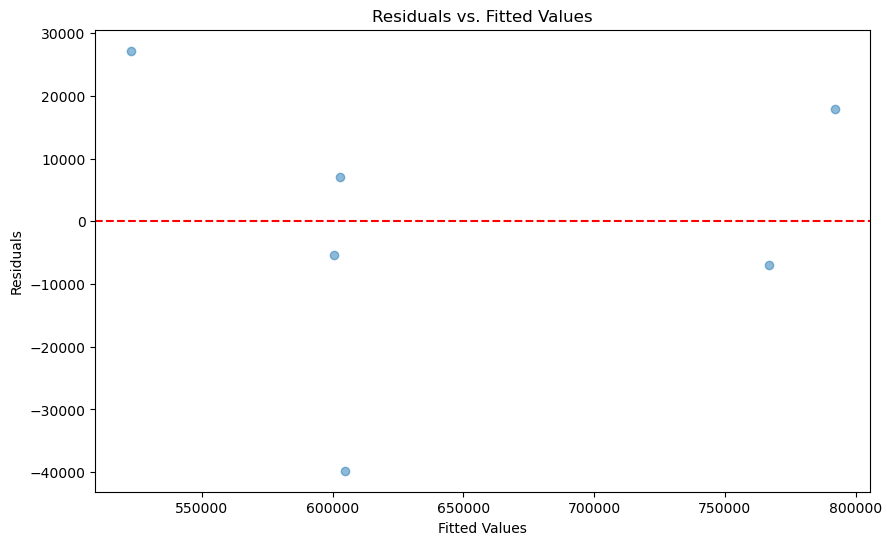

In [10]:
# Obtain the residuals
residuals = model.resid

# Residuals vs. Fitted Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

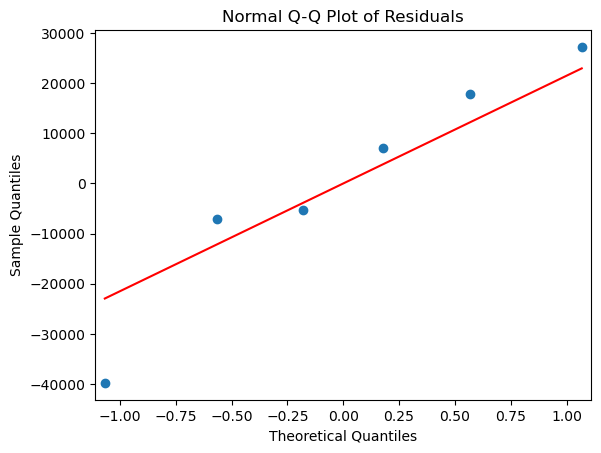

In [11]:
# Normal Q-Q Plot of Residuals
sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q Plot of Residuals')
plt.show()

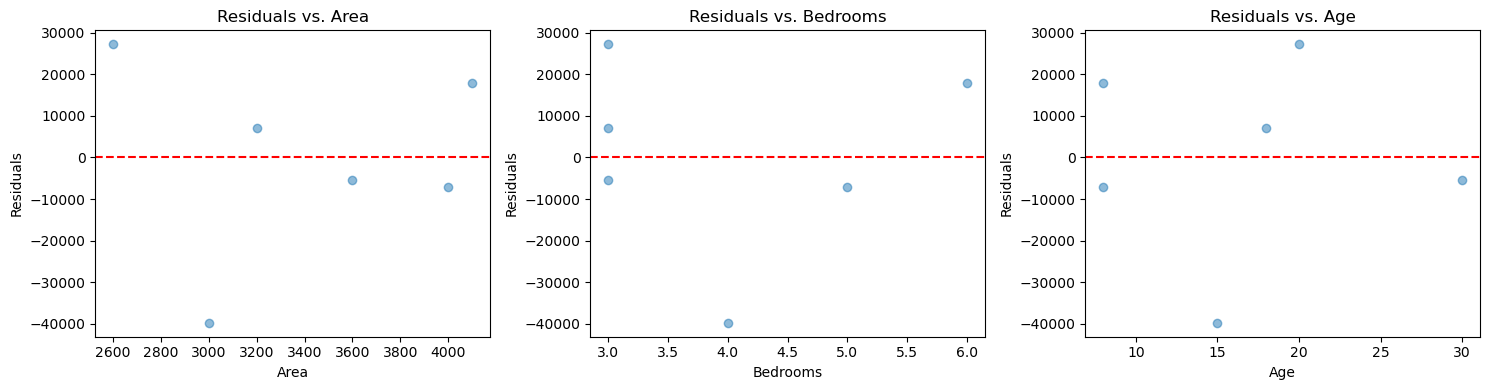

In [13]:
# Residuals vs. Each Predictor Plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

for i, predictor in enumerate(['Area', 'Bedrooms', 'Age']):
    ax = axes[i]
    ax.scatter(df[predictor], residuals, alpha=0.5)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_title(f'Residuals vs. {predictor}')
    ax.set_xlabel(predictor)
    ax.set_ylabel('Residuals')

plt.tight_layout()
plt.show()

# Question 2

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [44]:
# Assume we have a DataFrame 'df' with a time series data
df = pd.read_excel('Stock_Market_data.xlsx')
df[:50]

,Date,Open,High,Low,Close,Volume
0,2015-01-04 16:00:00,40.60,40.76,40.31,40.72,36865322
1,2015-02-04 16:00:00,40.66,40.74,40.12,40.29,37487476
2,2015-06-04 16:00:00,40.34,41.78,40.18,41.55,39223692
3,2015-07-04 16:00:00,41.61,41.91,41.31,41.53,28809375
4,2015-08-04 16:00:00,41.48,41.69,41.04,41.42,24753438
5,2015-09-04 16:00:00,41.25,41.62,41.25,41.48,25723861
6,2015-10-04 16:00:00,41.63,41.95,41.41,41.72,28022002
7,4/13/2015 16:00:00,41.40,42.06,41.39,41.76,30276692
8,4/14/2015 16:00:00,41.80,42.03,41.39,41.65,24244382
9,4/15/2015 16:00:00,41.76,42.46,41.68,42.26,27343581


In [18]:
# Let's use the first 40 data points for training and the rest for testing
train, test = df['Close'][0:40], df['Close'][40:50]

# Fit the model
model = ARIMA(train, order=(1,0,0)) # Autoregressive, differencing, Moving Average
model_fit = model.fit()
# Forecast
forecast = model_fit.forecast(steps=10)

print_df=pd.DataFrame([test, forecast])
print_df

,40,41,42,43,44,45,46,47,48,49
Close,46.860000,47.230000,46.920000,46.850000,46.360000,46.140000,45.730000,45.650000,46.610000,46.440000
predicted_mean,47.334742,47.224324,47.118544,47.017207,46.920125,46.827121,46.738024,46.652668,46.570897,46.492561


In [19]:
mape = np.mean(np.abs((test - forecast) / test)) * 100
print(f"Mean Absolute Percentage Error: {mape:.2f}%")

Mean Absolute Percentage Error: 0.91%


In [20]:

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, forecast))
print(f'Test RMSE: {rmse:.3f}')

Test RMSE: 0.557


Scale of the data: If the values in your time series data are on a small scale, say between 0 and 10, an RMSE of 1.260 would be considered relatively high, indicating that the model's predictions deviate significantly from the actual values. On the other hand, if the values in your data are on a larger scale, such as thousands or millions, an RMSE of 1.260 might be considered acceptable or even good, depending on the precision required for your application.

Context of the data: The interpretation of the RMSE value also depends on the context of your data. For example, if you're forecasting stock prices or currency exchange rates, where small fluctuations can have significant financial implications, an RMSE of 1.260 might be considered too high. However, if you're forecasting something like the number of visitors to a website, where small deviations are less critical, an RMSE of 1.260 might be acceptable.

Comparison with other models: It's often helpful to compare the RMSE value of your forecasting model with the RMSE values of other models or benchmarks. If your model's RMSE is lower than other models or a baseline model, it indicates that your model is performing better than the alternatives.

Relative or absolute interpretation: The RMSE value can be interpreted either in relative terms (e.g., as a percentage of the mean or median of the actual values) or in absolute terms (e.g., the actual units of measurement). The choice between relative and absolute interpretation depends on the context and the requirements of your analysis.

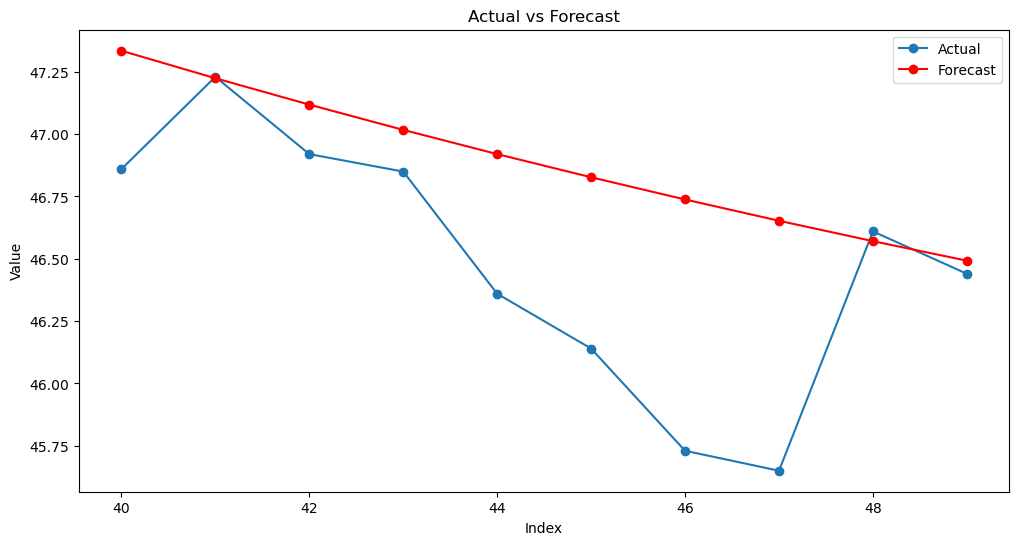

In [45]:

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test,marker='o', label='Actual')
plt.plot(test.index, forecast, color='red',marker='o', label='Forecast')
plt.title('Actual vs Forecast')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

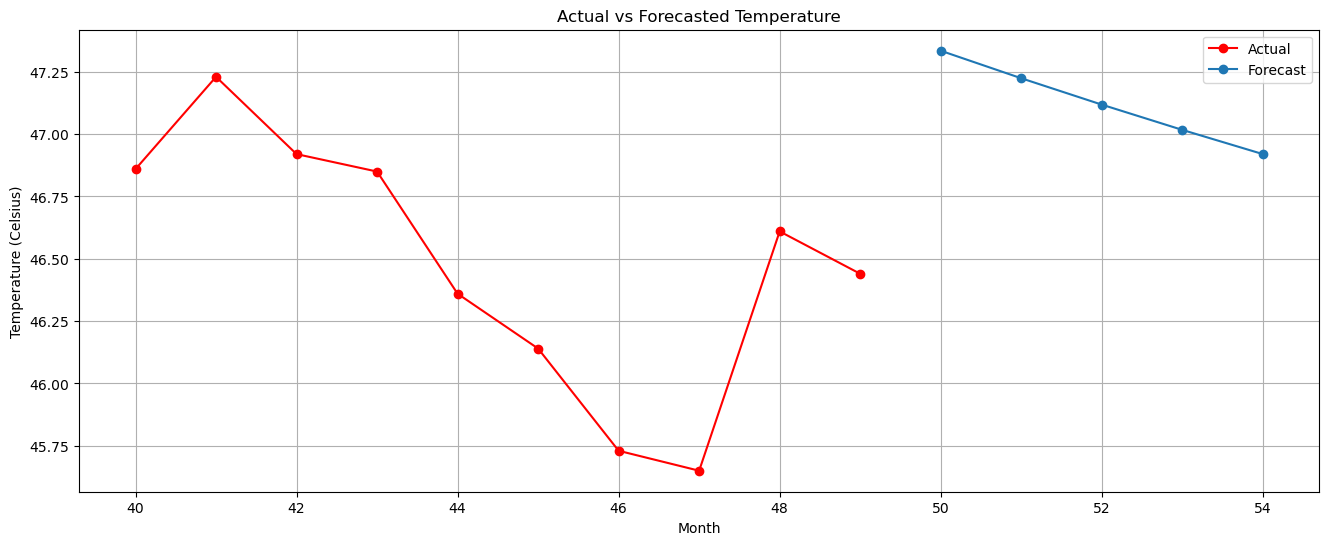

In [42]:
plt.figure(figsize=(16, 6))
plt.plot(test.index, test, color='red', marker='o', label='Actual')
plt.plot(range(test.index[-1] + 1, test.index[-1] + 1 + 5), forecast[:5], marker='o', label='Forecast')
plt.xlabel('Month')
plt.ylabel('Temperature (Celsius)')
plt.title('Actual vs Forecasted Temperature')
plt.legend()
plt.grid(True)
plt.show()
